In [3]:
!pip install brian2

     |████████████████████████████████| 1.6MB 5.0MB/s 
     |████████████████████████████████| 5.6MB 21.2MB/s 
  Created wheel for brian2: filename=Brian2-2.3.0.2-cp36-cp36m-linux_x86_64.whl size=1283477 sha256=e8b58fd053537e7ff778d45fd7ba8c52fb6cc29f6bde1b00837bdab459df0483
  Stored in directory: /root/.cache/pip/wheels/86/b5/f6/0c8f9eec58c01e4af55a4c79a5e0385aea01ed03e4ec36c4ac
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [0]:
from brian2 import *

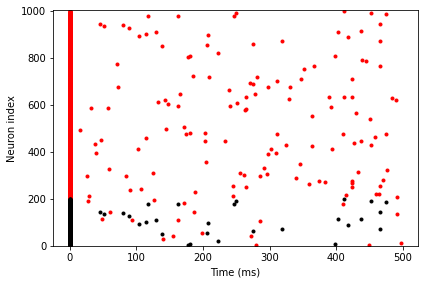

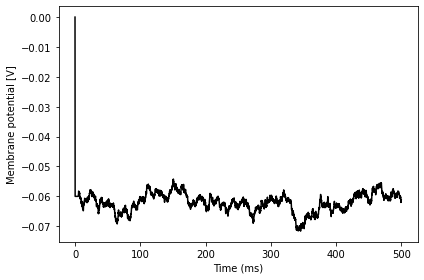

In [23]:
#          1000 neroun pop with arbitrary input and fully connections and ploting inh and ex
from brian2 import *
import random
start_scope()
taum = 20*ms
Vt = -50*mV
Vr = -60*mV
j0=1000
N=1000

eqs = '''
dv/dt  = -(v-Vr)/taum + xi/sqrt(ms)*mV   : volt (unless refractory)
'''
#xi =random input noise 

P = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr',
                refractory=5*ms, method='euler')
group_exc = P[:1000]
group_inh = P[800:]
# conecctions
c=Synapses(group_exc,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=j0/N
c=Synapses(group_exc,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=j0/N
c=Synapses(group_inh,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=-j0/N
c=Synapses(group_inh,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=-j0/N
#Monitor spikes
s_mon = SpikeMonitor(group_exc)
S_mon=SpikeMonitor(group_inh)

#Monitor membrane potential
v_mon = StateMonitor(P, variables='v', record = [0])

run(.5 * second)


plot(s_mon.t/ms, s_mon.i,'.r')
plot(S_mon.t/ms, S_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(P)+1])
show()

plot(v_mon.t/ms, v_mon.v[0], 'k')
xlabel('Time (ms)')
ylabel('Membrane potential [V]')
tight_layout()
show()

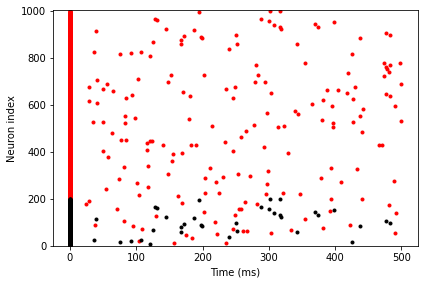

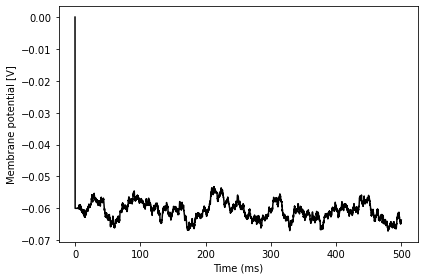

In [24]:
#1000 neroun pop with arbitrary input and probability=0.02 connections
from brian2 import *
import random
start_scope()
taum = 20*ms
Vt = -50*mV
Vr = -60*mV
j0=1000
N=1000

eqs = '''
dv/dt  = -(v-Vr)/taum + xi/sqrt(ms)*mV   : volt (unless refractory)
'''
#xi =random input noise 

P = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr',
                refractory=5*ms, method='euler')
group_exc = P[:1000]
group_inh = P[800:]
# conecctions
c=Synapses(group_exc,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i<800",p=0.02)
c.w=j0/N
c=Synapses(group_exc,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i<800",p=0.02)
c.w=j0/N
c=Synapses(group_inh,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i>=800",p=0.02)
c.w=-j0/N
c=Synapses(group_inh,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i>=800",p=0.02)
c.w=-j0/N

#Monitor spikes
s_mon = SpikeMonitor(group_exc)
S_mon=SpikeMonitor(group_inh)

#Monitor membrane potential
v_mon = StateMonitor(P, variables='v', record = [0])

run(.5 * second)


plot(s_mon.t/ms, s_mon.i,'.r')
plot(S_mon.t/ms, S_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(P)+1])
show()

plot(v_mon.t/ms, v_mon.v[0], 'k')
xlabel('Time (ms)')
ylabel('Membrane potential [V]')
tight_layout()
show()

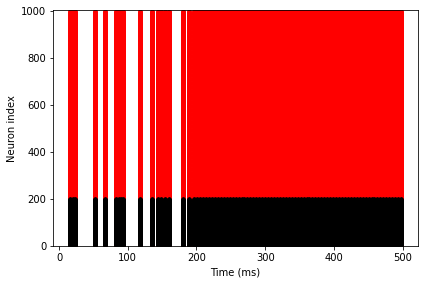

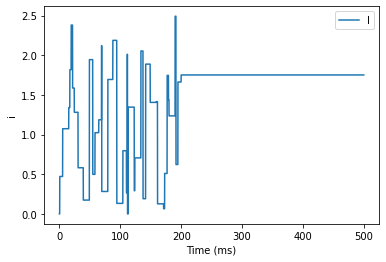

In [25]:
#all to all conected population arbitrary input
start_scope()
N=1000
A = 2.5
f = 10*Hz
tau = 5*ms
# Let's create an array
num_samples = int(200*ms/defaultclock.dt)
I_arr = zeros(num_samples)
for _ in range(100):
    a = randint(num_samples)
    I_arr[a:a+100] = rand()
I_recorded = TimedArray(A*I_arr, dt=defaultclock.dt)


eqs = '''
dv/dt = (I-v)/tau : 1
I = I_recorded(t) : 1
'''




G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
group_exc = G[:1000]
group_inh = G[800:]

# conecctions
c=Synapses(group_exc,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=j0/N
c=Synapses(group_exc,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=j0/N
c=Synapses(group_inh,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=-j0/N
c=Synapses(group_inh,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect()
c.w=-j0/N
#Monitor spikes
s_mon = SpikeMonitor(group_exc)
S_mon=SpikeMonitor(group_inh)

M = StateMonitor(G, variables=True, record=True)

run(.5 * second)

plot(s_mon.t/ms, s_mon.i,'.r')
plot(S_mon.t/ms, S_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(P)+1])
show()
plot(M.t/ms, M.I[0], label='I')
xlabel('Time (ms)')
ylabel('i')
legend(loc='best');


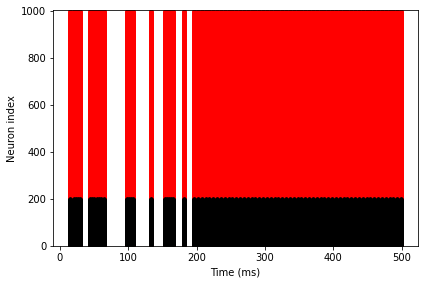

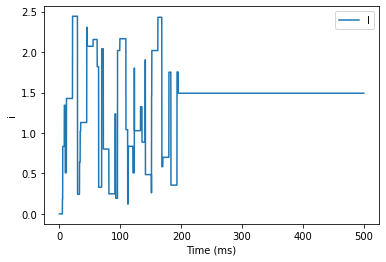

In [27]:
#probability conected population arbitrary input
start_scope()
N=1000
A = 2.5
f = 10*Hz
tau = 5*ms
# Let's create an array
num_samples = int(200*ms/defaultclock.dt)
I_arr = zeros(num_samples)
for _ in range(100):
    a = randint(num_samples)
    I_arr[a:a+100] = rand()
I_recorded = TimedArray(A*I_arr, dt=defaultclock.dt)


eqs = '''
dv/dt = (I-v)/tau : 1
I = I_recorded(t) : 1
'''




G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
group_exc = G[:1000]
group_inh = G[800:]

# conecctions
c=Synapses(group_exc,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i<800",p=0.02)
c.w=j0/N
c=Synapses(group_exc,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i<800",p=0.02)
c.w=j0/N
c=Synapses(group_inh,group_exc,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i>=800",p=0.02)
c.w=-j0/N
c=Synapses(group_inh,group_inh,'w:1')#all ex ,all in are coneccted to them selves and eachother 
c.connect("i>=800",p=0.02)
c.w=-j0/N

#Monitor spikes
s_mon = SpikeMonitor(group_exc)
S_mon=SpikeMonitor(group_inh)

M = StateMonitor(G, variables=True, record=True)

run(.5 * second)

plot(s_mon.t/ms, s_mon.i,'.r')
plot(S_mon.t/ms, S_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(P)+1])
show()
plot(M.t/ms, M.I[0], label='I')
xlabel('Time (ms)')
ylabel('i')
legend(loc='best');

WARNING    "synapses_4" has been included in the network but not the object on which it depends.Setting "synapses_4" to inactive. [brian2.core.magic.dependency_warning]
WARNING    "synapses_6" has been included in the network but not the object on which it depends.Setting "synapses_6" to inactive. [brian2.core.magic.dependency_warning]


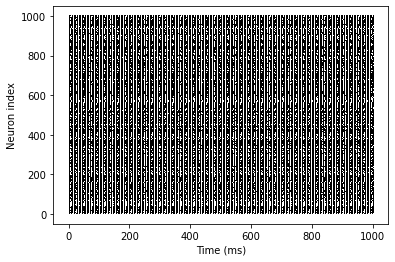

In [0]:
#random v ,delay , subgroup synaps
start_scope()
N=1000
taum = 20*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV
j0=1000

eqs='''
dv/dt = (v0 - v) / taum : volt (unless refractory)
v0 : volt
'''
P = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,method='exact')
group_exc = group[:800]
group_inh = group[800:]
P.v = 'Vr + rand() * (Vt - Vr)'

 #conectivity
Ce = Synapses(group_exc,group_exc,'w:1',on_pre='v += w',delay=1*ms)
Ci = Synapses(group_inh, group_inh,'w:1',on_pre='v += w',delay=1*ms)
Ce.connect()
Ci.connect()
Ce.w=(j0/N)  # excitatory synaptic weight 
Ci.w=j0/N     # inhibitory synaptic weight

s_mon = SpikeMonitor(P)

run(1 * second)

plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()


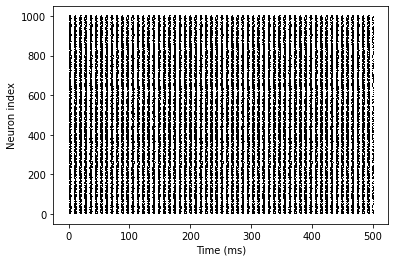

In [22]:
#conected with probability ,subgroup synaps
start_scope()
N=1000
taum = 20*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV
j0=1000

eqs='''
dv/dt = (v0 - v) / taum : volt (unless refractory)
v0 : volt
'''
P = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,method='exact')
group_exc = P[:800]
group_inh = P[800:]
P.v = 'Vr + rand() * (Vt - Vr)'

 #conectivity
Ce = Synapses(group_exc,group_exc,'w:1')
Ci = Synapses(group_inh, group_inh,'w:1')
Ce.connect('i<800',p=0.02) # probability =p(1-p)=0.02
Ci.connect('i>=800',p=0.02)
Ce.w=(j0/N)  # excitatory synaptic weight 
Ci.w=j0/N     # inhibitory synaptic weight
C = Synapses(P, P,'w:1')
C.connect(p=0.02)
c.w=j0/N
s_mon = SpikeMonitor(P)
run(.5 *second)


plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()


In [11]:
!pip install neurodynex


     |████████████████████████████████| 71kB 2.1MB/s 


INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe9d5166da0>)

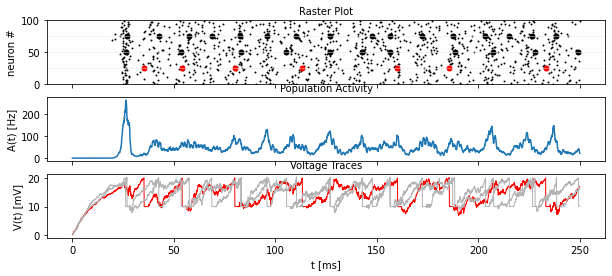

In [0]:
%matplotlib inline
from neurodynex.brunel_model import LIF_spiking_network
from neurodynex.tools import plot_tools
import brian2 as b2
#sparsely conected LIF network with inhibitory and exhibitory population 
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

stimulus start: 0.15, stimulus end: 0.5
simulating 426 neurons. Start: Sat May  9 10:49:39 2020
sim end: Sat May  9 10:53:32 2020


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


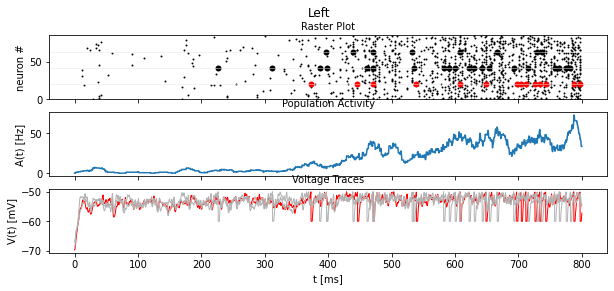

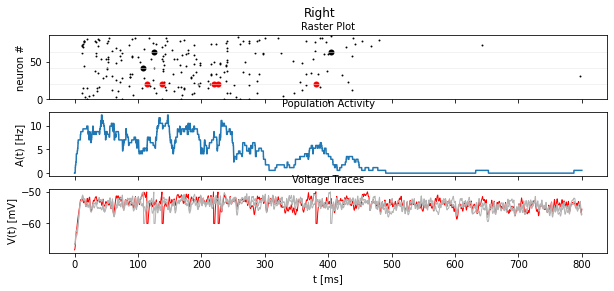

In [12]:
%matplotlib inline
from neurodynex.competing_populations import decision_making

decision_making.getting_started()

simulating 480 neurons. Start: Sat May  9 13:45:55 2020
sim end: Sat May  9 13:48:57 2020


INFO       width adjusted from 2. ms to 2.1 ms [brian2.monitors.ratemonitor.adjusted_width]


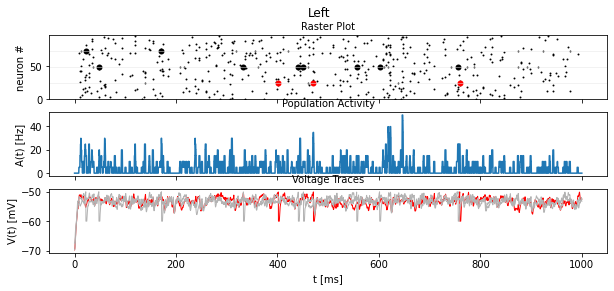

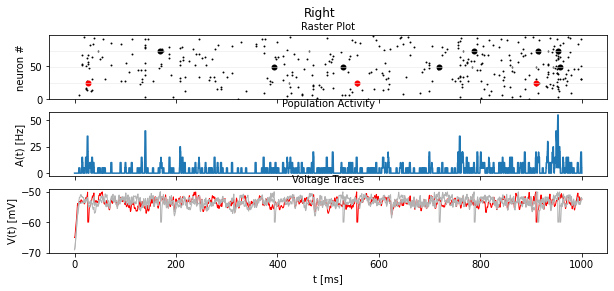

In [35]:
import brian2 as b2
from neurodynex.tools import plot_tools
from neurodynex.competing_populations import decision_making
import matplotlib.pyplot as plt

results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.6, max_sim_time=1000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right")
plt.show()

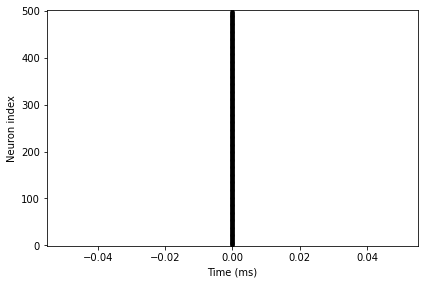

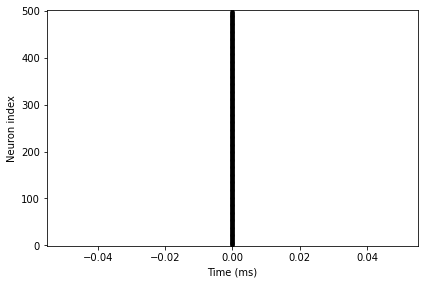

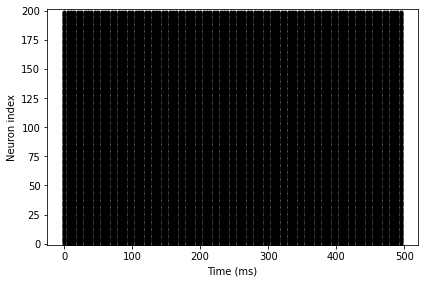

In [6]:
#3 population in descion making 
from brian2 import *
import random
start_scope()
taum = 20*ms
Vt = -50*mV
Vr = -60*mV
j0=1000
N1=500
N2=500
N3=200
Vti=-100*mV

eqs = '''
dv/dt  = -(v-Vr)/taum   : volt (unless refractory)
'''

P = NeuronGroup(N1, eqs, threshold='v>Vt', reset='v = Vr',
            refractory=5*ms, method='euler')

G=NeuronGroup(N2, eqs, threshold='v>Vt', reset='v = Vr',
                refractory=5*ms, method='euler')

inh=NeuronGroup(N3, eqs, threshold='v>Vti', reset='v = Vr',
                refractory=5*ms, method='euler') # since the network must be balanced the threshold of the inhibitory pop is 2 times smalerr that exi pops 

poissonG1=PoissonGroup(500,np.arange(500)*Hz + 10*Hz)
poissonG2=PoissonGroup(500,np.arange(500)*Hz + 0.1*Hz)

S = Synapses(poissonG1, G)
S.connect()
S = Synapses(poissonG2, P)
S.connect()
# conecctions
c=Synapses(P,P,'w:1')#all ex are coneccted to them selves and eachother 
c.connect()
c.w=j0/N1

c=Synapses(G,G,'w:1')#all ex are coneccted to them selves and eachother 
c.connect()
c.w=j0/N2

c=Synapses(inh,inh,'w:1')#all inh are coneccted to them selves and eachother 
c.connect()
c.w=j0/N3

c=Synapses(P,G,'w:1')# ex pops are coneccted to  eachother with posetive weight
c.connect()
c.w=j0/N1

c=Synapses(P,inh ,'w:1')#ex pop and inh pop  are coneccted to  eachother with posetive weight
c.connect()
c.w=j0/N3

c=Synapses(G,inh ,'w:1')#ex pop and inh  pop are coneccted to  eachother with posetive weight
c.connect()
c.w=j0/N3

c=Synapses(inh,P ,'w:1')#ex pop and inh pop are coneccted to  eachother with negative weight
c.connect()
c.w=-j0/N3

c=Synapses(inh,G ,'w:1')#ex pop and inh pop  are coneccted to  eachother with negative weight
c.connect()
c.w=-j0/N3



#Monitor spikes
p_mon = SpikeMonitor(P)
g_mon = SpikeMonitor(G)
inh_mon = SpikeMonitor(inh)


run(.5 * second)


plot(p_mon.t/ms, p_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(P)+1])
show()

plot(g_mon.t/ms, g_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(G)+1])
show()

plot(inh_mon.t/ms, inh_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout()
ylim([-1, len(inh)+1])
show()


